# Week-20 Assignment Homework

1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.
2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown


In a Jupyter notebook: 
    
3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization. 



In [24]:
%%HTML
<style>
.container { width:70% }
</style>

In [25]:
import nltk

In [26]:
from nltk.corpus import gutenberg
from nltk.tokenize import regexp_tokenize, TweetTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [27]:
# Show the titles of those books that are part of the gutenberg corpus
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [163]:
# Retrieve the book "Paradise Lost" by John Milton.
print(gutenberg.raw('milton-paradise.txt'))


[Paradise Lost by John Milton 1667] 
 
 
Book I 
 
 
Of Man's first disobedience, and the fruit 
Of that forbidden tree whose mortal taste 
Brought death into the World, and all our woe, 
With loss of Eden, till one greater Man 
Restore us, and regain the blissful seat, 
Sing, Heavenly Muse, that, on the secret top 
Of Oreb, or of Sinai, didst inspire 
That shepherd who first taught the chosen seed 
In the beginning how the heavens and earth 
Rose out of Chaos: or, if Sion hill 
Delight thee more, and Siloa's brook that flowed 
Fast by the oracle of God, I thence 
Invoke thy aid to my adventurous song, 
That with no middle flight intends to soar 
Above th' Aonian mount, while it pursues 
Things unattempted yet in prose or rhyme. 
And chiefly thou, O Spirit, that dost prefer 
Before all temples th' upright heart and pure, 
Instruct me, for thou know'st; thou from the first 
Wast present, and, with mighty wings outspread, 
Dove-like sat'st brooding on the vast Abyss, 
And mad'st it pregn

In [120]:
print(gutenberg.sents('milton-paradise.txt'))

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [121]:
print(gutenberg.words('milton-paradise.txt'))

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', ...]


In [122]:
paradise_lost = [w.lower() for w in gutenberg.words('milton-paradise.txt') if w[0].isalpha()]
len(paradise_lost) #numbers of words

80493

In [166]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
final_tokens = []
for each in words:
    if each not in stop_words:
        final_tokens.append(each)
print("The number of total tokens after removing stopwords are", len((final_tokens)))

The number of total tokens after removing stopwords are 12


In [196]:
#stop words are common words that we want to get rid of them
# nltk.download('stopwords')
sw = set(nltk.corpus.stopwords.words('english'))
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [189]:
text_sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')
print(text_sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [190]:
from collections import Counter
word_list = ['bridge', 'bridge', 'apple', 'Bridge', 'bridge', 'Bridge']
word_new_list = [word.lower() for word in word_list]
counts = Counter(word_new_list)
counts
# i=0
# while i<20:


Counter({'bridge': 5, 'apple': 1})

In [197]:
#stop words are all lowercase. we want to do this too
for sentence in text_sentences:
    #but we are still preserving the original cases of the words
    filtered_list = [w for w in sentence if w.lower() not in sw]
    print(filtered_list)

['[', 'Paradise', 'Lost', 'John', 'Milton', '1667', ']']
['Book']
['Man', "'", 'first', 'disobedience', ',', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', ',', 'woe', ',', 'loss', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'regain', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', ',', 'secret', 'top', 'Oreb', ',', 'Sinai', ',', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', ':', ',', 'Sion', 'hill', 'Delight', 'thee', ',', 'Siloa', "'", 'brook', 'flowed', 'Fast', 'oracle', 'God', ',', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', ',', 'middle', 'flight', 'intends', 'soar', 'th', "'", 'Aonian', 'mount', ',', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme', '.']
['chiefly', 'thou', ',', 'Spirit', ',', 'dost', 'prefer', 'temples', 'th', "'", 'upright', 'heart', 'pure', ',', 'Instruct', ',', 'thou', 'know', "'", 'st'

['faith', ',', 'love', ',', 'virtue', ',', 'unassayed', 'Alone', ',', 'without', 'exteriour', 'help', 'sustained', '?']
['Let', 'us', 'suspect', 'happy', 'state', 'Left', 'imperfect', 'Maker', 'wise', ',', 'secure', 'single', 'combined', '.']
['Frail', 'happiness', ',', ',', 'Eden', 'Eden', ',', 'thus', 'exposed', '.']
['thus', 'Adam', 'fervently', 'replied', '.']
['Woman', ',', 'best', 'things', 'God', 'ordained', ':', 'creating', 'hand', 'Nothing', 'imperfect', 'deficient', 'left', 'created', ',', 'much', 'less', 'Man', ',', 'aught', 'might', 'happy', 'state', 'secure', ',', 'Secure', 'outward', 'force', ';', 'within', 'danger', 'lies', ',', 'yet', 'lies', 'within', 'power', ':', 'receive', 'harm', '.']
['God', 'left', 'free', ';', 'obeys', 'Reason', ',', 'free', ';', 'Reason', 'made', 'right', ',', 'bid', 'well', 'ware', ',', 'still', 'erect', ';', 'Lest', ',', 'fair', '-', 'appearing', 'good', 'surprised', ',', 'dictate', 'false', ';', 'mis', '-', 'inform', 'God', 'expressly', 'hat

In [198]:
# take one or two characters that should be eliminated, and write a list comprehension to remove them

filter_words=[]
for sentence in text_sentences:
    filtered_list = [w for w in sentence if w.lower() not in sw]
    new_filtered_list = [w for w in filtered_list if w.isalnum()]
    filter_words.append(new_filtered_list)

for w in filter_words:
    
    print(w)

['Paradise', 'Lost', 'John', 'Milton', '1667']
['Book']
['Man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', 'woe', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'us', 'regain', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', 'Sion', 'hill', 'Delight', 'thee', 'Siloa', 'brook', 'flowed', 'Fast', 'oracle', 'God', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'th', 'Aonian', 'mount', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme']
['chiefly', 'thou', 'Spirit', 'dost', 'prefer', 'temples', 'th', 'upright', 'heart', 'pure', 'Instruct', 'thou', 'know', 'st', 'thou', 'first', 'Wast', 'present', 'mighty', 'wings', 'outspread', 'Dove', 'like', 'sat', 'st', 'brooding', 'vast', 'Abyss', 'mad', 'st', 'pre

In [199]:
# def remove_stopwords(text_sentences):
#     filtered_text =[word for word in text_sentences if word not in sw]
#     return filtered_text
    

In [203]:
# remove_stopwords(text_sentences)

# for word in text_sentences:
#     print(word)


In [208]:
import nltk
nltk.download('omw-1.4')
  

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rsagu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [228]:
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

wnl = WordNetLemmatizer()

lemmatizer=[]

for w in filter_words:
    lemmatizer.append([w for w in map(wnl.lemmatize,w)])

freq = (word for sentence in lemmatizer for word in sentence)
freq_count_words = FreqDist(freq)

for word, frequency in freq_count_words.most_common(20):
    print(word, frequency)

Heaven 412
thou 382
thy 339
thee 337
God 258
shall 241
thus 240
u 179
yet 165
though 161
first 156
day 153
Man 135
high 128
Hell 117
may 116
Earth 115
one 114
great 113
thing 110


Heaven 412
thou 382
thy 339
thee 337
God 258
shall 241
thus 240
u 179
yet 165
though 161
first 156
day 153
Man 135
high 128
Hell 117
may 116
Earth 115
one 114
great 113
thing 110


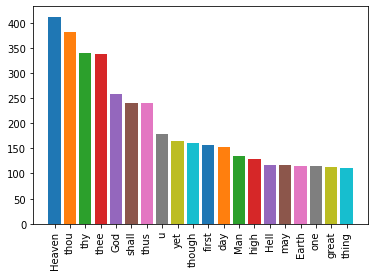

In [223]:
wnl = WordNetLemmatizer()
lemmatizer=[]
for w in filter_words:
    lemmatizer.append([wn for wn in map(wnl.lemmatize,w)])
# print(lemmatizer)
freq = (word for sentence in lemmatizer for word in sentence)
freq_count_words = Counter(freq)
for word, frequency in freq_count_words.most_common(20):
    print(word, frequency)
    
#     plt.hist(word, frequency)
    plt.bar(word, frequency)
    plt.xticks(rotation=90)

4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [37]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rsagu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [301]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import subjectivity

In [302]:
analyzer = SentimentIntensityAnalyzer()

text_sentences = nltk.corpus.gutenberg.sents('milton-paradise.txt')
print(text_sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [303]:
def put_together(input_sent):
    '''This function puts the sentence back together'''
    str1=" "
    
    # the join command puts the strings together but it needs to be in a list so it was appended to the output
    output = str1.join(input_sent)
    return output

In [304]:
out=[]

for i in range(0,len(text_sentences)):
    out.append(put_together(text_sentences[i]))
print(out)

['[ Paradise Lost by John Milton 1667 ]', 'Book I', "Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .", "And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me , for thou know ' st ; thou from the first Wast present , and , with mighty wings outspread , Dove - like sat ' st brooding on the vast Abyss 

In [305]:
import pandas as pd
sa_df = pd.DataFrame(columns = ['Sentence', 'Compound', 'Negative', 'Neutral', 'Positive'])
sa_df

Empty DataFrame
Columns: [Sentence, Compound, Negative, Neutral, Positive]
Index: []

In [306]:
for sentence in out:
    sid = SentimentIntensityAnalyzer()
    print(sentence)
    ss = sid.polarity_scores(sentence)
    sa_df['Sentence']=sentence
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]),end='')
        
    print()

[ Paradise Lost by John Milton 1667 ]
compound: 0.4404, neg: 0.219, neu: 0.381, pos: 0.4, 
Book I
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .
compound: 0.8885, neg: 0.117, neu: 0.691, pos: 0.192, 
And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me

the angry Victor hath recalled His ministers of vengeance and pursuit Back to the gates of Heaven : the sulphurous hail , Shot after us in storm , o ' erblown hath laid The fiery surge that from the precipice Of Heaven received us falling ; and the thunder , Winged with red lightning and impetuous rage , Perhaps hath spent his shafts , and ceases now To bellow through the vast and boundless Deep .
compound: -0.4588, neg: 0.14, neu: 0.758, pos: 0.102, 
Let us not slip th ' occasion , whether scorn Or satiate fury yield it from our Foe .
compound: -0.8519, neg: 0.417, neu: 0.583, pos: 0.0, 
Seest thou yon dreary plain , forlorn and wild , The seat of desolation , void of light , Save what the glimmering of these livid flames Casts pale and dreadful ?
compound: -0.6808, neg: 0.251, neu: 0.657, pos: 0.091, 
Thither let us tend From off the tossing of these fiery waves ; There rest , if any rest can harbour there ; And , re - assembling our afflicted powers , Consult how we may henceforth m

They heard , and were abashed , and up they sprung Upon the wing , as when men wont to watch On duty , sleeping found by whom they dread , Rouse and bestir themselves ere well awake .
compound: -0.2263, neg: 0.083, neu: 0.859, pos: 0.058, 
Nor did they not perceive the evil plight In which they were , or the fierce pains not feel ; Yet to their General ' s voice they soon obeyed Innumerable .
compound: 0.1818, neg: 0.089, neu: 0.798, pos: 0.112, 
As when the potent rod Of Amram ' s son , in Egypt ' s evil day , Waved round the coast , up - called a pitchy cloud Of locusts , warping on the eastern wind , That o ' er the realm of impious Pharaoh hung Like Night , and darkened all the land of Nile ; So numberless were those bad Angels seen Hovering on wing under the cope of Hell , ' Twixt upper , nether , and surrounding fires ; Till , as a signal given , th ' uplifted spear Of their great Sultan waving to direct Their course , in even balance down they light On the firm brimstone , and f

And now his heart Distends with pride , and , hardening in his strength , Glories : for never , since created Man , Met such embodied force as , named with these , Could merit more than that small infantry Warred on by cranes -- though all the giant brood Of Phlegra with th ' heroic race were joined That fought at Thebes and Ilium , on each side Mixed with auxiliar gods ; and what resounds In fable or romance of Uther ' s son , Begirt with British and Armoric knights ; And all who since , baptized or infidel , Jousted in Aspramont , or Montalban , Damasco , or Marocco , or Trebisond , Or whom Biserta sent from Afric shore When Charlemain with all his peerage fell By Fontarabbia .
compound: 0.9054, neg: 0.057, neu: 0.799, pos: 0.144, 
Thus far these beyond Compare of mortal prowess , yet observed Their dread Commander .
compound: -0.4588, neg: 0.2, neu: 0.8, pos: 0.0, 
He , above the rest In shape and gesture proudly eminent , Stood like a tower .
compound: 0.7269, neg: 0.0, neu: 0.643,

Nor was his name unheard or unadored In ancient Greece ; and in Ausonian land Men called him Mulciber ; and how he fell From Heaven they fabled , thrown by angry Jove Sheer o ' er the crystal battlements : from morn To noon he fell , from noon to dewy eve , A summer ' s day , and with the setting sun Dropt from the zenith , like a falling star , On Lemnos , th ' Aegaean isle .
compound: 0.128, neg: 0.087, neu: 0.832, pos: 0.08, 
Thus they relate , Erring ; for he with this rebellious rout Fell long before ; nor aught aviled him now To have built in Heaven high towers ; nor did he scape By all his engines , but was headlong sent , With his industrious crew , to build in Hell .
compound: -0.7906, neg: 0.156, neu: 0.803, pos: 0.041, 
Meanwhile the winged Heralds , by command Of sovereign power , with awful ceremony And trumpet ' s sound , throughout the host proclaim A solemn council forthwith to be held At Pandemonium , the high capital Of Satan and his peers .
compound: -0.5106, neg: 0.

On th ' other side up rose Belial , in act more graceful and humane .
compound: 0.5095, neg: 0.0, neu: 0.785, pos: 0.215, 
A fairer person lost not Heaven ; he seemed For dignity composed , and high exploit .
compound: -0.4023, neg: 0.354, neu: 0.497, pos: 0.149, 
But all was false and hollow ; though his tongue Dropped manna , and could make the worse appear The better reason , to perplex and dash Maturest counsels : for his thoughts were low -- To vice industrious , but to nobler deeds Timorous and slothful .
compound: -0.631, neg: 0.177, neu: 0.747, pos: 0.076, 
Yet he pleased the ear , And with persuasive accent thus began :-- " I should be much for open war , O Peers , As not behind in hate , if what was urged Main reason to persuade immediate war Did not dissuade me most , and seem to cast Ominous conjecture on the whole success ; When he who most excels in fact of arms , In what he counsels and in what excels Mistrustful , grounds his courage on despair And utter dissolution , a

Thither let us bend all our thoughts , to learn What creatures there inhabit , of what mould Or substance , how endued , and what their power And where their weakness : how attempted best , By force of subtlety .
compound: 0.34, neg: 0.07, neu: 0.825, pos: 0.105, 
Though Heaven be shut , And Heaven ' s high Arbitrator sit secure In his own strength , this place may lie exposed , The utmost border of his kingdom , left To their defence who hold it : here , perhaps , Some advantageous act may be achieved By sudden onset -- either with Hell - fire To waste his whole creation , or possess All as our own , and drive , as we were driven , The puny habitants ; or , if not drive , Seduce them to our party , that their God May prove their foe , and with repenting hand Abolish his own works .
compound: 0.8807, neg: 0.119, neu: 0.657, pos: 0.224, 
This would surpass Common revenge , and interrupt his joy In our confusion , and our joy upraise In his disturbance ; when his darling sons , Hurled he

Then of their session ended they bid cry With trumpet ' s regal sound the great result : Toward the four winds four speedy Cherubim Put to their mouths the sounding alchemy , By herald ' s voice explained ; the hollow Abyss Heard far adn wide , and all the host of Hell With deafening shout returned them loud acclaim .
compound: -0.7003, neg: 0.157, neu: 0.778, pos: 0.065, 
Thence more at ease their minds , and somewhat raised By false presumptuous hope , the ranged Powers Disband ; and , wandering , each his several way Pursues , as inclination or sad choice Leads him perplexed , where he may likeliest find Truce to his restless thoughts , and entertain The irksome hours , till his great Chief return .
compound: 0.6786, neg: 0.116, neu: 0.697, pos: 0.187, 
Part on the plain , or in the air sublime , Upon the wing or in swift race contend , As at th ' Olympian games or Pythian fields ; Part curb their fiery steeds , or shun the goal With rapid wheels , or fronted brigades form : As when

compound: -0.8992, neg: 0.407, neu: 0.593, pos: 0.0, 
On th ' other side , Incensed with indignation , Satan stood Unterrified , and like a comet burned , That fires the length of Ophiuchus huge In th ' arctic sky , and from his horrid hair Shakes pestilence and war .
compound: -0.875, neg: 0.296, neu: 0.601, pos: 0.103, 
Each at the head Levelled his deadly aim ; their fatal hands No second stroke intend ; and such a frown Each cast at th ' other as when two black clouds , With heaven ' s artillery fraught , came rattling on Over the Caspian ,-- then stand front to front Hovering a space , till winds the signal blow To join their dark encounter in mid - air .
compound: -0.0516, neg: 0.086, neu: 0.831, pos: 0.083, 
So frowned the mighty combatants that Hell Grew darker at their frown ; so matched they stood ; For never but once more was wither like To meet so great a foe .
compound: 0.7131, neg: 0.164, neu: 0.58, pos: 0.256, 
And now great deeds Had been achieved , whereof all Hell had

Sin and Death amain , Following his track ( such was the will of Heaven ) Paved after him a broad and beaten way Over the dark Abyss , whose boiling gulf Tamely endured a bridge of wondrous length , From Hell continued , reaching th ' utmost orb Of this frail World ; by which the Spirits perverse With easy intercourse pass to and fro To tempt or punish mortals , except whom God and good Angels guard by special grace .
compound: -0.6808, neg: 0.216, neu: 0.594, pos: 0.19, 
But now at last the sacred influence Of light appears , and from the walls of Heaven Shoots far into the bosom of dim Night A glimmering dawn .
compound: 0.6652, neg: 0.0, neu: 0.849, pos: 0.151, 
Here Nature first begins Her farthest verge , and Chaos to retire , As from her outmost works , a broken foe , With tumult less and with less hostile din ; That Satan with less toil , and now with ease , Wafts on the calmer wave by dubious light , And , like a weather - beaten vessel , holds Gladly the port , though shrouds 

that be from thee far , That far be from thee , Father , who art judge Of all things made , and judgest only right .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Or shall the Adversary thus obtain His end , and frustrate thine ?
compound: -0.5859, neg: 0.348, neu: 0.652, pos: 0.0, 
shall he fulfill His malice , and thy goodness bring to nought , Or proud return , though to his heavier doom , Yet with revenge accomplish ' d , and to Hell Draw after him the whole race of mankind , By him corrupted ?
compound: 0.0258, neg: 0.204, neu: 0.571, pos: 0.225, 
or wilt thou thyself Abolish thy creation , and unmake For him , what for thy glory thou hast made ?
compound: 0.6808, neg: 0.0, neu: 0.741, pos: 0.259, 
So should thy goodness and thy greatness both Be question ' d and blasphem ' d without defence .
compound: 0.453, neg: 0.078, neu: 0.725, pos: 0.197, 
To whom the great Creator thus replied .
compound: 0.6249, neg: 0.0, neu: 0.594, pos: 0.406, 
O son , in whom my soul hath chief delight

Mean while The world shall burn , and from her ashes spring New Heaven and Earth , wherein the just shall dwell , And , after all their tribulations long , See golden days , fruitful of golden deeds , With joy and peace triumphing , and fair truth .
compound: 0.9584, neg: 0.0, neu: 0.63, pos: 0.37, 
Then thou thy regal scepter shalt lay by , For regal scepter then no more shall need , God shall be all in all .
compound: 0.0422, neg: 0.09, neu: 0.814, pos: 0.096, 
But , all ye Gods , Adore him , who to compass all this dies ; Adore the Son , and honour him as me .
compound: 0.9505, neg: 0.0, neu: 0.534, pos: 0.466, 
No sooner had the Almighty ceased , but all The multitude of Angels , with a shout Loud as from numbers without number , sweet As from blest voices , uttering joy , Heaven rung With jubilee , and loud Hosannas filled The eternal regions : Lowly reverent Towards either throne they bow , and to the ground With solemn adoration down they cast Their crowns inwove with amarant an

So spake the false dissembler unperceived ; For neither Man nor Angel can discern Hypocrisy , the only evil that walks Invisible , except to God alone , By his permissive will , through Heaven and Earth : And oft , though wisdom wake , suspicion sleeps At wisdom ' s gate , and to simplicity Resigns her charge , while goodness thinks no ill Where no ill seems : Which now for once beguiled Uriel , though regent of the sun , and held The sharpest - sighted Spirit of all in Heaven ; Who to the fraudulent impostor foul , In his uprightness , answer thus returned .
compound: -0.5106, neg: 0.206, neu: 0.623, pos: 0.17, 
Fair Angel , thy desire , which tends to know The works of God , thereby to glorify The great Work - master , leads to no excess That reaches blame , but rather merits praise The more it seems excess , that led thee hither From thy empyreal mansion thus alone , To witness with thine eyes what some perhaps , Contented with report , hear only in Heaven : For wonderful indeed are

But say I could repent , and could obtain , By act of grace , my former state ; how soon Would highth recall high thoughts , how soon unsay What feigned submission swore ?
compound: 0.5719, neg: 0.0, neu: 0.879, pos: 0.121, 
Ease would recant Vows made in pain , as violent and void .
compound: -0.6908, neg: 0.407, neu: 0.452, pos: 0.141, 
For never can true reconcilement grow , Where wounds of deadly hate have pierced so deep : Which would but lead me to a worse relapse And heavier fall : so should I purchase dear Short intermission bought with double smart .
compound: 0.0463, neg: 0.176, neu: 0.667, pos: 0.158, 
This knows my Punisher ; therefore as far From granting he , as I from begging , peace ; All hope excluded thus , behold , in stead Mankind created , and for him this world .
compound: 0.6597, neg: 0.139, neu: 0.579, pos: 0.282, 
So farewell , hope ; and with hope farewell , fear ; Farewell , remorse !
compound: 0.3289, neg: 0.295, neu: 0.334, pos: 0.37, 
all good to me is los

About them round A lion now he stalks with fiery glare ; Then as a tiger , who by chance hath spied In some purlieu two gentle fawns at play , Straight couches close , then , rising , changes oft His couchant watch , as one who chose his ground , Whence rushing , he might surest seize them both , Griped in each paw : when , Adam first of men To first of women Eve thus moving speech , Turned him , all ear to hear new utterance flow .
compound: 0.7964, neg: 0.029, neu: 0.834, pos: 0.137, 
Sole partner , and sole part , of all these joys , Dearer thyself than all ; needs must the Power That made us , and for us this ample world , Be infinitely good , and of his good As liberal and free as infinite ; That raised us from the dust , and placed us here In all this happiness , who at his hand Have nothing merited , nor can perform Aught whereof he hath need ; he who requires From us no other service than to keep This one , this easy charge , of all the trees In Paradise that bear delicious fru

Sweet is the breath of Morn , her rising sweet , With charm of earliest birds : pleasant the sun , When first on this delightful land he spreads His orient beams , on herb , tree , fruit , and flower , Glistering with dew ; fragrant the fertile earth After soft showers ; and sweet the coming on Of grateful Evening mild ; then silent Night , With this her solemn bird , and this fair moon , And these the gems of Heaven , her starry train : But neither breath of Morn , when she ascends With charm of earliest birds ; nor rising sun On this delightful land ; nor herb , fruit , flower , Glistering with dew ; nor fragrance after showers ; Nor grateful Evening mild ; nor silent Night , With this her solemn bird , nor walk by moon , Or glittering star - light , without thee is sweet .
compound: 0.986, neg: 0.017, neu: 0.745, pos: 0.238, 
But wherefore all night long shine these ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
for whom This glorious sight , when sleep hath shut all eyes ?
compoun

Know ye not then said Satan , filled with scorn , Know ye not me ?
compound: -0.4019, neg: 0.184, neu: 0.816, pos: 0.0, 
ye knew me once no mate For you , there sitting where ye durst not soar : Not to know me argues yourselves unknown , The lowest of your throng ; or , if ye know , Why ask ye , and superfluous begin Your message , like to end as much in vain ?
compound: -0.7717, neg: 0.19, neu: 0.764, pos: 0.047, 
To whom thus Zephon , answering scorn with scorn .
compound: -0.6597, neg: 0.474, neu: 0.526, pos: 0.0, 
Think not , revolted Spirit , thy shape the same , Or undiminished brightness to be known , As when thou stoodest in Heaven upright and pure ; That glory then , when thou no more wast good , Departed from thee ; and thou resemblest now Thy sin and place of doom obscure and foul .
compound: 0.5515, neg: 0.16, neu: 0.639, pos: 0.201, 
But come , for thou , be sure , shalt give account To him who sent us , whose charge is to keep This place inviolable , and these from harm .

The Fiend looked up , and knew His mounted scale aloft : Nor more ; but fled Murmuring , and with him fled the shades of night .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Book V
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Now Morn , her rosy steps in the eastern clime Advancing , sowed the earth with orient pearl , When Adam waked , so customed ; for his sleep Was aery - light , from pure digestion bred , And temperate vapours bland , which the only sound Of leaves and fuming rills , Aurora ' s fan , Lightly dispersed , and the shrill matin song Of birds on every bough ; so much the more His wonder was to find unwakened Eve With tresses discomposed , and glowing cheek , As through unquiet rest : He , on his side Leaning half raised , with looks of cordial love Hung over her enamoured , and beheld Beauty , which , whether waking or asleep , Shot forth peculiar graces ; then with voice Mild , as when Zephyrus on Flora breathes , Her hand soft touching , whispered thus .
compound: 0

Speak , ye who best can tell , ye sons of light , Angels ; for ye behold him , and with songs And choral symphonies , day without night , Circle his throne rejoicing ; ye in Heaven On Earth join all ye Creatures to extol Him first , him last , him midst , and without end .
compound: 0.926, neg: 0.0, neu: 0.765, pos: 0.235, 
Fairest of stars , last in the train of night , If better thou belong not to the dawn , Sure pledge of day , that crownest the smiling morn With thy bright circlet , praise him in thy sphere , While day arises , that sweet hour of prime .
compound: 0.9493, neg: 0.0, neu: 0.676, pos: 0.324, 
Thou Sun , of this great world both eye and soul , Acknowledge him thy greater ; sound his praise In thy eternal course , both when thou climbest , And when high noon hast gained , and when thou fallest .
compound: 0.927, neg: 0.0, neu: 0.695, pos: 0.305, 
Moon , that now meetest the orient sun , now flyest , With the fixed Stars , fixed in their orb that flies ; And ye five othe

Whom thus the angelick Virtue answered mild .
compound: 0.4215, neg: 0.0, neu: 0.682, pos: 0.318, 
Adam , I therefore came ; nor art thou such Created , or such place hast here to dwell , As may not oft invite , though Spirits of Heaven , To visit thee ; lead on then where thy bower O ' ershades ; for these mid - hours , till evening rise , I have at will .
compound: 0.6549, neg: 0.03, neu: 0.829, pos: 0.141, 
So to the sylvan lodge They came , that like Pomona ' s arbour smiled , With flowerets decked , and fragrant smells ; but Eve , Undecked save with herself , more lovely fair Than Wood - Nymph , or the fairest Goddess feigned Of three that in mount Ida naked strove , Stood to entertain her guest from Heaven ; no veil She needed , virtue - proof ; no thought infirm Altered her cheek .
compound: 0.9745, neg: 0.065, neu: 0.605, pos: 0.33, 
On whom the Angel Hail Bestowed , the holy salutation used Long after to blest Mary , second Eve .
compound: 0.0772, neg: 0.0, neu: 0.925, pos: 0.

High matter thou enjoinest me , O prime of men , Sad task and hard : For how shall I relate To human sense the invisible exploits Of warring Spirits ?
compound: -0.8271, neg: 0.317, neu: 0.647, pos: 0.036, 
how , without remorse , The ruin of so many glorious once And perfect while they stood ?
compound: 0.9196, neg: 0.0, neu: 0.457, pos: 0.543, 
how last unfold The secrets of another world , perhaps Not lawful to reveal ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
yet for thy good This is dispensed ; and what surmounts the reach Of human sense , I shall delineate so , By likening spiritual to corporal forms , As may express them best ; though what if Earth Be but a shadow of Heaven , and things therein Each to other like , more than on earth is thought ?
compound: 0.9062, neg: 0.0, neu: 0.776, pos: 0.224, 
As yet this world was not , and Chaos wild Reigned where these Heavens now roll , where Earth now rests Upon her center poised ; when on a day ( For time , though in eternity , a

much less for this to be our Lord , And look for adoration , to the abuse Of those imperial titles , which assert Our being ordained to govern , not to serve .
compound: -0.0772, neg: 0.12, neu: 0.769, pos: 0.111, 
Thus far his bold discourse without controul Had audience ; when among the Seraphim Abdiel , than whom none with more zeal adored The Deity , and divine commands obeyed , Stood up , and in a flame of zeal severe The current of his fury thus opposed .
compound: 0.4549, neg: 0.12, neu: 0.704, pos: 0.176, 
O argument blasphemous , false , and proud !
compound: 0.2244, neg: 0.281, neu: 0.337, pos: 0.381, 
Words which no ear ever to hear in Heaven Expected , least of all from thee , Ingrate , In place thyself so high above thy peers .
compound: 0.2732, neg: 0.08, neu: 0.8, pos: 0.12, 
Canst thou with impious obloquy condemn The just decree of God , pronounced and sworn , That to his only Son , by right endued With regal scepter , every soul in Heaven Shall bend the knee , and in 

Well done ; well hast thou fought The better fight , who single hast maintained Against revolted multitudes the cause Of truth , in word mightier than they in arms ; And for the testimony of truth hast borne Universal reproach , far worse to bear Than violence ; for this was all thy care To stand approved in sight of God , though worlds Judged thee perverse : The easier conquest now Remains thee , aided by this host of friends , Back on thy foes more glorious to return , Than scorned thou didst depart ; and to subdue By force , who reason for their law refuse , Right reason for their law , and for their King Messiah , who by right of merit reigns .
compound: 0.8977, neg: 0.137, neu: 0.639, pos: 0.224, 
Go , Michael , of celestial armies prince , And thou , in military prowess next , Gabriel , lead forth to battle these my sons Invincible ; lead forth my armed Saints , By thousands and by millions , ranged for fight , Equal in number to that Godless crew Rebellious : Them with fire and 

Hence then , and evil go with thee along , Thy offspring , to the place of evil , Hell ; Thou and thy wicked crew !
compound: -0.9589, neg: 0.501, neu: 0.499, pos: 0.0, 
there mingle broils , Ere this avenging sword begin thy doom , Or some more sudden vengeance , winged from God , Precipitate thee with augmented pain .
compound: -0.5994, neg: 0.214, neu: 0.712, pos: 0.075, 
So spake the Prince of Angels ; to whom thus The Adversary .
compound: -0.2023, neg: 0.153, neu: 0.847, pos: 0.0, 
Nor think thou with wind Of aery threats to awe whom yet with deeds Thou canst not .
compound: -0.4215, neg: 0.149, neu: 0.851, pos: 0.0, 
Hast thou turned the least of these To flight , or if to fall , but that they rise Unvanquished , easier to transact with me That thou shouldst hope , imperious , and with threats To chase me hence ?
compound: 0.5927, neg: 0.086, neu: 0.74, pos: 0.175, 
err not , that so shall end The strife which thou callest evil , but we style The strife of glory ; which we mean 

He , who therefore can invent With what more forcible we may offend Our yet unwounded enemies , or arm Ourselves with like defence , to me deserves No less than for deliverance what we owe .
compound: -0.5719, neg: 0.192, neu: 0.709, pos: 0.099, 
Whereto with look composed Satan replied .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Not uninvented that , which thou aright Believest so main to our success , I bring .
compound: 0.5719, neg: 0.0, neu: 0.764, pos: 0.236, 
Which of us who beholds the bright surface Of this ethereous mould whereon we stand , This continent of spacious Heaven , adorned With plant , fruit , flower ambrosial , gems , and gold ; Whose eye so superficially surveys These things , as not to mind from whence they grow Deep under ground , materials dark and crude , Of spiritous and fiery spume , till touched With Heaven ' s ray , and tempered , they shoot forth So beauteous , opening to the ambient light ?
compound: 0.7645, neg: 0.096, neu: 0.734, pos: 0.17, 
These 

Scepter and power , thy giving , I assume , And gladlier shall resign , when in the end Thou shalt be all in all , and I in thee For ever ; and in me all whom thou lovest : But whom thou hatest , I hate , and can put on Thy terrours , as I put thy mildness on , Image of thee in all things ; and shall soon , Armed with thy might , rid Heaven of these rebelled ; To their prepared ill mansion driven down , To chains of darkness , and the undying worm ; That from thy just obedience could revolt , Whom to obey is happiness entire .
compound: -0.2617, neg: 0.136, neu: 0.747, pos: 0.118, 
Then shall thy Saints unmixed , and from the impure Far separate , circling thy holy mount , Unfeigned Halleluiahs to thee sing , Hymns of high praise , and I among them Chief .
compound: 0.5574, neg: 0.0, neu: 0.882, pos: 0.118, 
So said , he , o ' er his scepter bowing , rose From the right hand of Glory where he sat ; And the third sacred morn began to shine , Dawning through Heaven .
compound: 0.875, neg

Know then , that , after Lucifer from Heaven ( So call him , brighter once amidst the host Of Angels , than that star the stars among ,) Fell with his flaming legions through the deep Into his place , and the great Son returned Victorious with his Saints , the Omnipotent Eternal Father from his throne beheld Their multitude , and to his Son thus spake .
compound: 0.8824, neg: 0.0, neu: 0.847, pos: 0.153, 
At least our envious Foe hath failed , who thought All like himself rebellious , by whose aid This inaccessible high strength , the seat Of Deity supreme , us dispossessed , He trusted to have seised , and into fraud Drew many , whom their place knows here no more : Yet far the greater part have kept , I see , Their station ; Heaven , yet populous , retains Number sufficient to possess her realms Though wide , and this high temple to frequent With ministeries due , and solemn rites : But , lest his heart exalt him in the harm Already done , to have dispeopled Heaven , My damage fondly

Forthwith the sounds and seas , each creek and bay , With fry innumerable swarm , and shoals Of fish that with their fins , and shining scales , Glide under the green wave , in sculls that oft Bank the mid sea : part single , or with mate , Graze the sea - weed their pasture , and through groves Of coral stray ; or , sporting with quick glance , Show to the sun their waved coats dropt with gold ; Or , in their pearly shells at ease , attend Moist nutriment ; or under rocks their food In jointed armour watch : on smooth the seal And bended dolphins play : part huge of bulk Wallowing unwieldy , enormous in their gait , Tempest the ocean : there leviathan , Hugest of living creatures , on the deep Stretched like a promontory sleeps or swims , And seems a moving land ; and at his gills Draws in , and at his trunk spouts out , a sea .
compound: 0.8271, neg: 0.0, neu: 0.934, pos: 0.066, 
Mean while the tepid caves , and fens , and shores , Their brood as numerous hatch , from the egg that so

Something yet of doubt remains , Which only thy solution can resolve .
compound: 0.34, neg: 0.162, neu: 0.519, pos: 0.318, 
When I behold this goodly frame , this world , Of Heaven and Earth consisting ; and compute Their magnitudes ; this Earth , a spot , a grain , An atom , with the firmament compared And all her numbered stars , that seem to roll Spaces incomprehensible , ( for such Their distance argues , and their swift return Diurnal ,) merely to officiate light Round this opacous Earth , this punctual spot , One day and night ; in all her vast survey Useless besides ; reasoning I oft admire , How Nature wise and frugal could commit Such disproportions , with superfluous hand So many nobler bodies to create , Greater so manifold , to this one use , For aught appears , and on their orbs impose Such restless revolution day by day Repeated ; while the sedentary Earth , That better might with far less compass move , Served by more noble than herself , attains Her end without least mo

But thy relation now ; for I attend , Pleased with thy words no less than thou with mine .
compound: 0.2617, neg: 0.136, neu: 0.678, pos: 0.186, 
So spake the Godlike Power , and thus our Sire .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
For Man to tell how human life began Is hard ; for who himself beginning knew Desire with thee still longer to converse Induced me .
compound: 0.3182, neg: 0.054, neu: 0.843, pos: 0.103, 
As new waked from soundest sleep , Soft on the flowery herb I found me laid , In balmy sweat ; which with his beams the sun Soon dried , and on the reeking moisture fed .
compound: -0.4588, neg: 0.091, neu: 0.909, pos: 0.0, 
Straight toward Heaven my wondering eyes I turned , And gazed a while the ample sky ; till , raised By quick instinctive motion , up I sprung , As thitherward endeavouring , and upright Stood on my feet : about me round I saw Hill , dale , and shady woods , and sunny plains , And liquid lapse of murmuring streams ; by these , Creatures that liv

compound: 0.7712, neg: 0.0, neu: 0.677, pos: 0.323, 
and wilt taste No pleasure , though in pleasure , solitary .
compound: 0.7351, neg: 0.141, neu: 0.385, pos: 0.474, 
What thinkest thou then of me , and this my state ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Seem I to thee sufficiently possessed Of happiness , or not ?
compound: 0.5574, neg: 0.0, neu: 0.69, pos: 0.31, 
who am alone From all eternity ; for none I know Second to me or like , equal much less .
compound: 0.128, neg: 0.103, neu: 0.769, pos: 0.128, 
How have I then with whom to hold converse , Save with the creatures which I made , and those To me inferiour , infinite descents Beneath what other creatures are to thee ?
compound: 0.4939, neg: 0.0, neu: 0.894, pos: 0.106, 
He ceased ; I lowly answered .
compound: -0.25, neg: 0.4, neu: 0.6, pos: 0.0, 
To attain The highth and depth of thy eternal ways All human thoughts come short , Supreme of things !
compound: 0.5983, neg: 0.0, neu: 0.814, pos: 0.186, 
Thou in thyself

compound: -0.4195, neg: 0.133, neu: 0.756, pos: 0.11, 
Thus he resolved , but first from inward grief His bursting passion into plaints thus poured .
compound: 0.0129, neg: 0.199, neu: 0.554, pos: 0.247, 
More justly , seat worthier of Gods , as built With second thoughts , reforming what was old !
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
O Earth , how like to Heaven , if not preferred For what God , after better , worse would build ?
compound: 0.7717, neg: 0.124, neu: 0.442, pos: 0.434, 
Terrestrial Heaven , danced round by other Heavens That shine , yet bear their bright officious lamps , Light above light , for thee alone , as seems , In thee concentring all their precious beams Of sacred influence !
compound: 0.8977, neg: 0.047, neu: 0.653, pos: 0.301, 
As God in Heaven Is center , yet extends to all ; so thou , Centring , receivest from all those orbs : in thee , Not in themselves , all their known virtue appears Productive in herb , plant , and nobler birth Of creatures anim

Offspring of Heaven and Earth , and all Earth ' s Lord !
compound: 0.5562, neg: 0.0, neu: 0.69, pos: 0.31, 
That such an enemy we have , who seeks Our ruin , both by thee informed I learn , And from the parting Angel over - heard , As in a shady nook I stood behind , Just then returned at shut of evening flowers .
compound: -0.8074, neg: 0.177, neu: 0.823, pos: 0.0, 
But , that thou shouldst my firmness therefore doubt To God or thee , because we have a foe May tempt it , I expected not to hear .
compound: -0.6652, neg: 0.239, neu: 0.672, pos: 0.089, 
His violence thou fearest not , being such As we , not capable of death or pain , Can either not receive , or can repel .
compound: -0.7534, neg: 0.312, neu: 0.586, pos: 0.102, 
His fraud is then thy fear ; which plain infers Thy equal fear , that my firm faith and love Can by his fraud be shaken or seduced ; Thoughts , which how found they harbour in thy breast , Adam , mis - thought of her to thee so dear ?
compound: -0.7531, neg: 0.282

The first , at least , of these I thought denied To beasts ; whom God , on their creation - day , Created mute to all articulate sound : The latter I demur ; for in their looks Much reason , and in their actions , oft appears .
compound: 0.3182, neg: 0.069, neu: 0.784, pos: 0.147, 
Thee , Serpent , subtlest beast of all the field I knew , but not with human voice endued ; Redouble then this miracle , and say , How camest thou speakable of mute , and how To me so friendly grown above the rest Of brutal kind , that daily are in sight ?
compound: 0.9165, neg: 0.089, neu: 0.649, pos: 0.262, 
Say , for such wonder claims attention due .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
To whom the guileful Tempter thus replied .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Empress of this fair world , resplendent Eve !
compound: 0.4436, neg: 0.0, neu: 0.673, pos: 0.327, 
Easy to me it is to tell thee all What thou commandest ; and right thou shouldst be obeyed : I was at first as other beasts 

compound: -0.6448, neg: 0.32, neu: 0.558, pos: 0.122, 
How dies the Serpent ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
he hath eaten and lives , And knows , and speaks , and reasons , and discerns , Irrational till then .
compound: -0.34, neg: 0.138, neu: 0.862, pos: 0.0, 
For us alone Was death invented ?
compound: -0.7096, neg: 0.596, neu: 0.404, pos: 0.0, 
or to us denied This intellectual food , for beasts reserved ?
compound: 0.1027, neg: 0.204, neu: 0.563, pos: 0.232, 
For beasts it seems : yet that one beast which first Hath tasted envies not , but brings with joy The good befallen him , author unsuspect , Friendly to man , far from deceit or guile .
compound: 0.8735, neg: 0.118, neu: 0.59, pos: 0.292, 
What fear I then ?
compound: -0.4939, neg: 0.615, neu: 0.385, pos: 0.0, 
rather , what know to fear Under this ignorance of good and evil , Of God or death , of law or penalty ?
compound: -0.9186, neg: 0.486, neu: 0.371, pos: 0.143, 
Here grows the cure of all , this fruit d

They destitute and bare Of all their virtue : Silent , and in face Confounded , long they sat , as strucken mute : Till Adam , though not less than Eve abashed , At length gave utterance to these words constrained .
compound: 0.34, neg: 0.038, neu: 0.887, pos: 0.075, 
O Eve , in evil hour thou didst give ear To that false worm , of whomsoever taught To counterfeit Man ' s voice ; true in our fall , False in our promised rising ; since our eyes Opened we find indeed , and find we know Both good and evil ; good lost , and evil got ; Bad fruit of knowledge , if this be to know ; Which leaves us naked thus , of honour void , Of innocence , of faith , of purity , Our wonted ornaments now soiled and stained , And in our faces evident the signs Of foul concupiscence ; whence evil store ; Even shame , the last of evils ; of the first Be sure then .-- How shall I behold the face Henceforth of God or Angel , erst with joy And rapture so oft beheld ?
compound: -0.6369, neg: 0.185, neu: 0.631, pos

O Heaven !
compound: 0.5562, neg: 0.0, neu: 0.0, pos: 1.0, 
in evil strait this day I stand Before my Judge ; either to undergo Myself the total crime , or to accuse My other self , the partner of my life ; Whose failing , while her faith to me remains , I should conceal , and not expose to blame By my complaint : but strict necessity Subdues me , and calamitous constraint ; Lest on my head both sin and punishment , However insupportable , be all Devolved ; though should I hold my peace , yet thou Wouldst easily detect what I conceal .-- This Woman , whom thou madest to be my help , And gavest me as thy perfect gift , so good , So fit , so acceptable , so divine , That from her hand I could suspect no ill , And what she did , whatever in itself , Her doing seemed to justify the deed ; She gave me of the tree , and I did eat .
compound: 0.9762, neg: 0.152, neu: 0.589, pos: 0.26, 
To whom the Sovran Presence thus replied .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Was she thy God , t

So , if great things to small may be compared , Xerxes , the liberty of Greece to yoke , From Susa , his Memnonian palace high , Came to the sea : and , over Hellespont Bridging his way , Europe with Asia joined , And scourged with many a stroke the indignant waves .
compound: 0.7165, neg: 0.054, neu: 0.795, pos: 0.151, 
Now had they brought the work by wonderous art Pontifical , a ridge of pendant rock , Over the vexed abyss , following the track Of Satan to the self - same place where he First lighted from his wing , and landed safe From out of Chaos , to the outside bare Of this round world : With pins of adamant And chains they made all fast , too fast they made And durable !
compound: -0.2714, neg: 0.056, neu: 0.903, pos: 0.041, 
And now in little space The confines met of empyrean Heaven , And of this World ; and , on the left hand , Hell With long reach interposed ; three several ways In sight , to each of these three places led .
compound: 0.25, neg: 0.102, neu: 0.73, pos: 0.16

However , some tradition they dispersed Among the Heathen , of their purchase got , And fabled how the Serpent , whom they called Ophion , with Eurynome , the wide -- Encroaching Eve perhaps , had first the rule Of high Olympus ; thence by Saturn driven And Ops , ere yet Dictaean Jove was born .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Mean while in Paradise the hellish pair Too soon arrived ; Sin , there in power before , Once actual ; now in body , and to dwell Habitual habitant ; behind her Death , Close following pace for pace , not mounted yet On his pale horse : to whom Sin thus began .
compound: -0.891, neg: 0.255, neu: 0.65, pos: 0.095, 
Second of Satan sprung , all - conquering Death !
compound: -0.636, neg: 0.411, neu: 0.589, pos: 0.0, 
What thinkest thou of our empire now , though earned With travel difficult , not better far Than still at Hell ' s dark threshold to have sat watch , Unnamed , undreaded , and thyself half starved ?
compound: -0.9202, neg: 0.327, neu: 0.6

How gladly would I meet Mortality my sentence , and be earth Insensible !
compound: 0.4574, neg: 0.0, neu: 0.693, pos: 0.307, 
How glad would lay me down As in my mother ' s lap !
compound: 0.5093, neg: 0.0, neu: 0.752, pos: 0.248, 
There I should rest , And sleep secure ; his dreadful voice no more Would thunder in my ears ; no fear of worse To me , and to my offspring , would torment me With cruel expectation .
compound: -0.9325, neg: 0.388, neu: 0.558, pos: 0.054, 
Yet one doubt Pursues me still , lest all I cannot die ; Lest that pure breath of life , the spirit of Man Which God inspired , cannot together perish With this corporeal clod ; then , in the grave , Or in some other dismal place , who knows But I shall die a living death ?
compound: -0.2751, neg: 0.188, neu: 0.626, pos: 0.186, 
O thought Horrid , if true !
compound: -0.2481, neg: 0.441, neu: 0.233, pos: 0.326, 
Yet why ?
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It was but breath Of life that sinned ; what dies but w

Remember with what mild And gracious temper he both heard , and judged , Without wrath or reviling ; we expected Immediate dissolution , which we thought Was meant by death that day ; when lo ! to thee Pains only in child - bearing were foretold , And bringing forth ; soon recompensed with joy , Fruit of thy womb : On me the curse aslope Glanced on the ground ; with labour I must earn My bread ; what harm ?
compound: -0.8553, neg: 0.197, neu: 0.716, pos: 0.087, 
Idleness had been worse ; My labour will sustain me ; and , lest cold Or heat should injure us , his timely care Hath , unbesought , provided ; and his hands Clothed us unworthy , pitying while he judged ; How much more , if we pray him , will his ear Be open , and his heart to pity incline , And teach us further by what means to shun The inclement seasons , rain , ice , hail , and snow !
compound: -0.6031, neg: 0.139, neu: 0.772, pos: 0.089, 
Which now the sky , with various face , begins To show us in this mountain ; while th

Eve , easily my faith admit , that all The good which we enjoy from Heaven descends ; But , that from us aught should ascend to Heaven So prevalent as to concern the mind Of God high - blest , or to incline his will , Hard to belief may seem ; yet this will prayer Or one short sigh of human breath , upborne Even to the seat of God .
compound: 0.9477, neg: 0.021, neu: 0.687, pos: 0.292, 
For since I sought By prayer the offended Deity to appease ; Kneeled , and before him humbled all my heart ; Methought I saw him placable and mild , Bending his ear ; persuasion in me grew That I was heard with favour ; peace returned Home to my breast , and to my memory His promise , that thy seed shall bruise our foe ; Which , then not minded in dismay , yet now Assures me that the bitterness of death Is past , and we shall live .
compound: 0.4464, neg: 0.124, neu: 0.71, pos: 0.166, 
Whence hail to thee , Eve rightly called , mother of all mankind , Mother of all things living , since by thee Man is t

Whom thus the Angel interrupted mild .
compound: -0.296, neg: 0.306, neu: 0.694, pos: 0.0, 
Lament not , Eve , but patiently resign What justly thou hast lost , nor set thy heart , Thus over - fond , on that which is not thine : Thy going is not lonely ; with thee goes Thy husband ; whom to follow thou art bound ; Where he abides , think there thy native soil .
compound: -0.1368, neg: 0.14, neu: 0.747, pos: 0.113, 
Adam , by this from the cold sudden damp Recovering , and his scattered spirits returned , To Michael thus his humble words addressed .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Celestial , whether among the Thrones , or named Of them the highest ; for such of shape may seem Prince above princes !
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
gently hast thou told Thy message , which might else in telling wound , And in performing end us ; what besides Of sorrow , and dejection , and despair , Our frailty can sustain , thy tidings bring , Departure from this happy place 

Death thou hast seen In his first shape on Man ; but many shapes Of Death , and many are the ways that lead To his grim cave , all dismal ; yet to sense More terrible at the entrance , than within .
compound: -0.9775, neg: 0.41, neu: 0.59, pos: 0.0, 
Some , as thou sawest , by violent stroke shall die ; By fire , flood , famine , by intemperance more In meats and drinks , which on the earth shall bring Diseases dire , of which a monstrous crew Before thee shall appear ; that thou mayest know What misery the inabstinence of Eve Shall bring on Men .
compound: -0.9509, neg: 0.273, neu: 0.727, pos: 0.0, 
Immediately a place Before his eyes appeared , sad , noisome , dark ; A lazar - house it seemed ; wherein were laid Numbers of all diseased ; all maladies Of ghastly spasm , or racking torture , qualms Of heart - sick agony , all feverous kinds , Convulsions , epilepsies , fierce catarrhs , Intestine stone and ulcer , colick - pangs , Demoniack phrenzy , moaping melancholy , And moon - str

From Man ' s effeminate slackness it begins , Said the Angel , who should better hold his place By wisdom , and superiour gifts received .
compound: 0.743, neg: 0.0, neu: 0.751, pos: 0.249, 
But now prepare thee for another scene .
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He looked , and saw wide territory spread Before him , towns , and rural works between ; Cities of men with lofty gates and towers , Concourse in arms , fierce faces threatening war , Giants of mighty bone and bold emprise ; Part wield their arms , part curb the foaming steed , Single or in array of battle ranged Both horse and foot , nor idly mustering stood ; One way a band select from forage drives A herd of beeves , fair oxen and fair kine , From a fat meadow ground ; or fleecy flock , Ewes and their bleating lambs over the plain , Their booty ; scarce with life the shepherds fly , But call in aid , which makes a bloody fray ; With cruel tournament the squadrons join ; Where cattle pastured late , now scatter

And now the tops of hills , as rocks , appear ; With clamour thence the rapid currents drive , Towards the retreating sea , their furious tide .
compound: -0.1027, neg: 0.132, neu: 0.75, pos: 0.118, 
Forthwith from out the ark a raven flies , And after him , the surer messenger , A dove sent forth once and again to spy Green tree or ground , whereon his foot may light : The second time returning , in his bill An olive - leaf he brings , pacifick sign : Anon dry ground appears , and from his ark The ancient sire descends , with all his train ; Then with uplifted hands , and eyes devout , Grateful to Heaven , over his head beholds A dewy cloud , and in the cloud a bow Conspicuous with three lifted colours gay , Betokening peace from God , and covenant new .
compound: 0.9201, neg: 0.0, neu: 0.863, pos: 0.137, 
Whereat the heart of Adam , erst so sad , Greatly rejoiced ; and thus his joy broke forth .
compound: 0.1445, neg: 0.26, neu: 0.459, pos: 0.281, 
O thou , who future things canst re

This ponder , that all nations of the earth Shall in his seed be blessed : By that seed Is meant thy great Deliverer , who shall bruise The Serpent ' s head ; whereof to thee anon Plainlier shall be revealed .
compound: 0.8402, neg: 0.0, neu: 0.81, pos: 0.19, 
This patriarch blest , Whom faithful Abraham due time shall call , A son , and of his son a grand - child , leaves ; Like him in faith , in wisdom , and renown : The grandchild , with twelve sons increased , departs From Canaan to a land hereafter called Egypt , divided by the river Nile See where it flows , disgorging at seven mouths Into the sea .
compound: 0.9403, neg: 0.0, neu: 0.75, pos: 0.25, 
To sojourn in that land He comes , invited by a younger son In time of dearth , a son whose worthy deeds Raise him to be the second in that realm Of Pharaoh .
compound: -0.1027, neg: 0.096, neu: 0.819, pos: 0.085, 
There he dies , and leaves his race Growing into a nation , and now grown Suspected to a sequent king , who seeks To stop

All nations they shall teach ; for , from that day , Not only to the sons of Abraham ' s loins Salvation shall be preached , but to the sons Of Abraham ' s faith wherever through the world ; So in his seed all nations shall be blest .
compound: 0.5719, neg: 0.0, neu: 0.915, pos: 0.085, 
Then to the Heaven of Heavens he shall ascend With victory , triumphing through the air Over his foes and thine ; there shall surprise The Serpent , prince of air , and drag in chains Through all his realm , and there confounded leave ; Then enter into glory , and resume His seat at God ' s right hand , exalted high Above all names in Heaven ; and thence shall come , When this world ' s dissolution shall be ripe , With glory and power to judge both quick and dead ; To judge the unfaithful dead , but to reward His faithful , and receive them into bliss , Whether in Heaven or Earth ; for then the Earth Shall all be Paradise , far happier place Than this of Eden , and far happier days .
compound: 0.9921, n

In [307]:
sa_df['Negative'] = [sid.polarity_scores(x)['neg'] for x in out]
sa_df['Compound'] = [sid.polarity_scores(x)['compound'] for x in out]
sa_df['Sentence'] = [x for x in out]
sa_df['Positive'] = [sid.polarity_scores(x)['pos'] for x in out]
sa_df['Neutral'] = [sid.polarity_scores(x)['neu'] for x in out]

sa_df

Sentence  Compound  Negative  \
0                 [ Paradise Lost by John Milton 1667 ]    0.4404     0.219   
1                                                Book I    0.0000     0.000   
2     Of Man ' s first disobedience , and the fruit ...    0.8885     0.117   
3     And chiefly thou , O Spirit , that dost prefer...    0.7331     0.085   
4     Say first -- for Heaven hides nothing from thy...    0.8689     0.093   
...                                                 ...       ...       ...   
1846  This further consolation yet secure I carry he...    0.5719     0.150   
1847  So spake our mother Eve ; and Adam heard Well ...    0.7469     0.000   
1848  High in front advanced , The brandished sword ...    0.6597     0.028   
1849  They , looking back , all the eastern side beh...    0.9068     0.061   
1850                                      [ The End ]    0.0000     0.000   

      Neutral  Positive  
0       0.381     0.400  
1       1.000     0.000  
2       0.691     0.192  
3       0.752     0.163  
4       0.668     0.239  
...       ...       ...  
1846    0.567     0.283  
1847    0.889     0.111  
1848    0.865     0.107  
1849    0.754     0.185  
1850    1.000     0.000  

[1851 rows x 5 columns]

In [308]:
compound = sa_df['Compound']
pos = sa_df['Positive']
neu = sa_df['Neutral']
neg = sa_df['Neutral']

sentiments.append({
            "Sentence":text_sentences,
            "Compound":compound,
            "Positive":pos,
            "Negative":neg,
            "Neutral":neu
})
print(sentiments)

[{'Compound': 0       0.4404
1       0.0000
2       0.8885
3       0.7331
4       0.8689
         ...  
1846    0.5719
1847    0.7469
1848    0.6597
1849    0.9068
1850    0.0000
Name: Compound, Length: 1851, dtype: float64, 'Positive': 0       0.400
1       0.000
2       0.192
3       0.163
4       0.239
        ...  
1846    0.283
1847    0.111
1848    0.107
1849    0.185
1850    0.000
Name: Positive, Length: 1851, dtype: float64, 'Negative': 0       0.381
1       1.000
2       0.691
3       0.752
4       0.668
        ...  
1846    0.567
1847    0.889
1848    0.865
1849    0.754
1850    1.000
Name: Neutral, Length: 1851, dtype: float64, 'Neutral': 0       0.381
1       1.000
2       0.691
3       0.752
4       0.668
        ...  
1846    0.567
1847    0.889
1848    0.865
1849    0.754
1850    1.000
Name: Neutral, Length: 1851, dtype: float64}, {'Sentence': '[ The End ]\x1a\x1a', 'Compound': 0       0.4404
1       0.0000
2       0.8885
3       0.7331
4       0.8689
         ...  
184

In [309]:
filter_words=[]
for sentence in text_sentences:
    filtered_list = [w for w in sentence if w.lower() not in sw]
    new_filtered_list = [w for w in filtered_list if w.isalnum()]
    filter_words.append(new_filtered_list)

for w in filter_words:
    
    print(w)

['Paradise', 'Lost', 'John', 'Milton', '1667']
['Book']
['Man', 'first', 'disobedience', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', 'woe', 'loss', 'Eden', 'till', 'one', 'greater', 'Man', 'Restore', 'us', 'regain', 'blissful', 'seat', 'Sing', 'Heavenly', 'Muse', 'secret', 'top', 'Oreb', 'Sinai', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', 'Sion', 'hill', 'Delight', 'thee', 'Siloa', 'brook', 'flowed', 'Fast', 'oracle', 'God', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', 'middle', 'flight', 'intends', 'soar', 'th', 'Aonian', 'mount', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme']
['chiefly', 'thou', 'Spirit', 'dost', 'prefer', 'temples', 'th', 'upright', 'heart', 'pure', 'Instruct', 'thou', 'know', 'st', 'thou', 'first', 'Wast', 'present', 'mighty', 'wings', 'outspread', 'Dove', 'like', 'sat', 'st', 'brooding', 'vast', 'Abyss', 'mad', 'st', 'pre

In [310]:
for number, sentence in enumerate(text_sentences):
    print(number, sentence)

0 ['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']']
1 ['Book', 'I']
2 ['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', ',', 'and', 'Siloa', "'", 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'oracle', 'of', 'God', ',', 'I', 'thence', 'Invoke', 'thy', 'aid', 'to', 'my', 'adventurous', 'son

819 ['All', 'night', 'the', 'dreadless', 'Angel', ',', 'unpursued', ',', 'Through', 'Heaven', "'", 's', 'wide', 'champain', 'held', 'his', 'way', ';', 'till', 'Morn', ',', 'Waked', 'by', 'the', 'circling', 'Hours', ',', 'with', 'rosy', 'hand', 'Unbarred', 'the', 'gates', 'of', 'light', '.']
820 ['There', 'is', 'a', 'cave', 'Within', 'the', 'mount', 'of', 'God', ',', 'fast', 'by', 'his', 'throne', ',', 'Where', 'light', 'and', 'darkness', 'in', 'perpetual', 'round', 'Lodge', 'and', 'dislodge', 'by', 'turns', ',', 'which', 'makes', 'through', 'Heaven', 'Grateful', 'vicissitude', ',', 'like', 'day', 'and', 'night', ';', 'Light', 'issues', 'forth', ',', 'and', 'at', 'the', 'other', 'door', 'Obsequious', 'darkness', 'enters', ',', 'till', 'her', 'hour', 'To', 'veil', 'the', 'Heaven', ',', 'though', 'darkness', 'there', 'might', 'well', 'Seem', 'twilight', 'here', ':', 'And', 'now', 'went', 'forth', 'the', 'Morn', 'Such', 'as', 'in', 'highest', 'Heaven', 'arrayed', 'in', 'gold', 'Empyreal', 

1607 ['Undoubtedly', 'he', 'will', 'relent', ',', 'and', 'turn', 'From', 'his', 'displeasure', ';', 'in', 'whose', 'look', 'serene', ',', 'When', 'angry', 'most', 'he', 'seemed', 'and', 'most', 'severe', ',', 'What', 'else', 'but', 'favour', ',', 'grace', ',', 'and', 'mercy', ',', 'shone', '?']
1608 ['So', 'spake', 'our', 'father', 'penitent', ';', 'nor', 'Eve', 'Felt', 'less', 'remorse', ':', 'they', ',', 'forthwith', 'to', 'the', 'place', 'Repairing', 'where', 'he', 'judged', 'them', ',', 'prostrate', 'fell', 'Before', 'him', 'reverent', ';', 'and', 'both', 'confessed', 'Humbly', 'their', 'faults', ',', 'and', 'pardon', 'begged', ';', 'with', 'tears', 'Watering', 'the', 'ground', ',', 'and', 'with', 'their', 'sighs', 'the', 'air', 'Frequenting', ',', 'sent', 'from', 'hearts', 'contrite', ',', 'in', 'sign', 'Of', 'sorrow', 'unfeigned', ',', 'and', 'humiliation', 'meek', '.']
1609 ['Thus', 'they', ',', 'in', 'lowliest', 'plight', ',', 'repentant', 'stood', 'Praying', ';', 'for', 'from'

In [311]:
def put_together(input_sent):
    '''This function puts the sentence back together'''
    str1=" "
    
    # the join command puts the strings together but it needs to be in a list so it was appended to the output
    output = str1.join(input_sent)
    
    return output

In [312]:
out=[]
sentence_scores = []

for i in range(0,len(text_sentences)):
    out.append(put_together(text_sentences[i]))
for number, sentence in enumerate(out):
#     print(number, sentence)
# Get each sentence and sentence number, which is what enumerate does
     # Use VADER to calculate sentiment
    scores = analyzer.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})
print(sentence_scores)

[{'sentence': '[ Paradise Lost by John Milton 1667 ]', 'sentence_number': 1, 'sentiment_score': 0.4404}, {'sentence': 'Book I', 'sentence_number': 2, 'sentiment_score': 0.0}, {'sentence': "Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .", 'sentence_number': 3, 'sentiment_score': 0.8885}, {'sentence': "And chiefly thou , O Spirit , that dost prefer Befo

In [313]:
pd.DataFrame(sentence_scores)

sentence  sentence_number  \
0                 [ Paradise Lost by John Milton 1667 ]                1   
1                                                Book I                2   
2     Of Man ' s first disobedience , and the fruit ...                3   
3     And chiefly thou , O Spirit , that dost prefer...                4   
4     Say first -- for Heaven hides nothing from thy...                5   
...                                                 ...              ...   
1846  This further consolation yet secure I carry he...             1847   
1847  So spake our mother Eve ; and Adam heard Well ...             1848   
1848  High in front advanced , The brandished sword ...             1849   
1849  They , looking back , all the eastern side beh...             1850   
1850                                      [ The End ]             1851   

      sentiment_score  
0              0.4404  
1              0.0000  
2              0.8885  
3              0.7331  
4              0.8689  
...               ...  
1846           0.5719  
1847           0.7469  
1848           0.6597  
1849           0.9068  
1850           0.0000  

[1851 rows x 3 columns]

In [314]:
# 5 most negative sentences.

# Assign DataFrame to variable red_df
paradise_df = pd.DataFrame(sentence_scores)

# Sort by the column "sentiment_score" and slice for first 10 values
paradise_df.sort_values(by='sentiment_score')[:5]

sentence  sentence_number  \
466   that now , While time was , our first parents ...              467   
1819  For this he shall live hated , be blasphemed ,...             1820   
279   Through many a dark and dreary vale They passe...              280   
1479  He , after Eve seduced , unminded slunk Into t...             1480   
1598  Or if thou covet death , as utmost end Of mise...             1599   

      sentiment_score  
466           -0.9952  
1819          -0.9950  
279           -0.9899  
1479          -0.9889  
1598          -0.9886

In [315]:
# 5 most positive sentences.

# Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values
paradise_df.sort_values(by='sentiment_score', ascending=False)[:5]

sentence  sentence_number  \
447   Round he surveys ( and well might , where he s...              448   
505   Beneath him with new wonder now he views , To ...              506   
507   Not that fair field Of Enna , where Proserpine...              508   
1843  This having learned , thou hast attained the s...             1844   
1113  Mine eyes he closed , but open left the cell O...             1114   

      sentiment_score  
447            0.9973  
505            0.9970  
507            0.9964  
1843           0.9961  
1113           0.9954

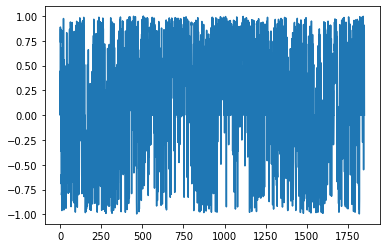

In [316]:
paradise_df['sentiment_score'].plot();

 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 